# <center>Penggunaan Citra MRI untuk Identifikasi Tumor Otak pada Lansia: Studi Dua Kategori TumorI</center>
#### <center>oleh</center>
## <center>Kelompok 22</center>

### Import Library

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import cv2 as cv
import os
import random
import pandas as pd
from skimage.feature import graycomatrix, graycoprops

Di sini kami menggunakan beberapa library seperti:
1. numpy digunakan untuk manipulasi array dan matriks, serta berbagai operasi numerik seperti aljabar linier, statistik, dan lainnya.
2. matplotlib digunakan untuk membuat berbagai jenis plot dan grafik, seperti garis, bar, scatter, histogram, dan banyak lagi, sehingga memudahkan analisis data.
3. CV2 digunakan untuk berbagai tugas pengolahan citra dan video, seperti deteksi objek, pengenalan wajah, pengolahan gambar, dan lainnya.
4. os digunakan untuk manipulasi file dan direktori, manajemen proses, serta interaksi dengan lingkungan sistem.
5. Random digunakan untuk berbagai operasi terkait dengan probabilitas dan statistik, seperti memilih elemen acak dari daftar, mengacak urutan, dan menghasilkan angka acak.
6. Pandas, digunakan untuk analisis data yang menyediakan struktur data dan alat untuk manipulasi data numerik
7. Skimage.feature, modul dari scikit-image untuk menghitung GLCM (Gray-Level Co-occurrence Matrix)  untuk ekstraksi fitur tekstur dari citra.

### Load Data

In [2]:
def insertGambar(folder):
    images = [] 
    filenames = [] 
    labels = [] 

    for label in os.listdir(folder): 
        for filename in os.listdir("dataset/"+label): 
            img = cv.imread(os.path.join("dataset/"+label,filename), 255) 
            filenames.append(filename) 
            labels.append(label) 
            if img is not None: 
                images.append(img) 
    return images, filenames, labels 

images, filenames, labels = insertGambar("dataset")

Kode di atas mendefinisikan sebuah fungsi bernama insertGambar yang digunakan untuk memuat gambar dari sebuah folder dataset dan mengembalikan daftar gambar, nama file, dan labelnya. 

Fungsi tersebut merupakan sebuah fungsi yang membaca semua gambar dari sebuah struktur folder yang disusun berdasarkan label. Setiap subfolder dalam folder utama dianggap sebagai label, dan setiap file gambar dalam subfolder tersebut dibaca dan disimpan dalam list. Nama file dan label juga disimpan dalam list terpisah. Hasil akhirnya adalah tiga list yang berisi gambar-gambar yang dibaca, nama file, dan label masing-masing gambar.

### Resize Gambar

In [3]:
def resize_image(image_list, scale_percent):
    resized_images = []
    for img in image_list:
        width = int(img.shape[1] * scale_percent / 100)
        height = int(img.shape[0] * scale_percent / 100)
        dim = (width, height)
        resized = cv.resize(img, dim, interpolation=cv.INTER_AREA)
        resized_images.append(resized)
    return resized_images

Fungsi "resize_image" di atas digunakan untuk meresize sebuah list dari gambar yang diberikan berdasarkan persentase skala yang diberikan.

Fungsi "resize_image" adalah implementasi sederhana untuk meresize sejumlah gambar yang diberikan dalam bentuk list, berdasarkan persentase skala yang ditentukan. Ini dapat digunakan untuk mengubah ukuran gambar-gambar sebelum melakukan proses analisis lebih lanjut, visualisasi, atau aplikasi pemrosesan gambar lainnya.

In [4]:
scaled_percent = 150
resized_images = resize_image(images, scaled_percent)

Kode di atas bertujuan untuk menghasilkan resized_images, yaitu daftar citra yang telah diperbesar sebesar 150% dari ukuran aslinya, menggunakan fungsi resize_image yang telah didefinisikan sebelumnya.

### Menampilkan Gambar yg Sudah di Resize

Kode di bawah bertujuan untuk menampilkan beberapa contoh gambar dari setiap label yang sudah diresize, menggunakan Matplotlib untuk membuat grid dari subplot yang menampilkan gambar-gambar tersebut.

Kode di bawah menggunakan Matplotlib untuk membuat grid subplot yang menampilkan beberapa contoh gambar dari setiap label yang telah diresize sebelumnya. Setiap subplot menampilkan gambar beserta judul yang terdiri dari label dan nama file gambar. Hal ini berguna untuk visualisasi data gambar yang telah diproses sebelumnya, seperti dalam tugas pengenalan pola atau pembelajaran mesin berbasis gambar.

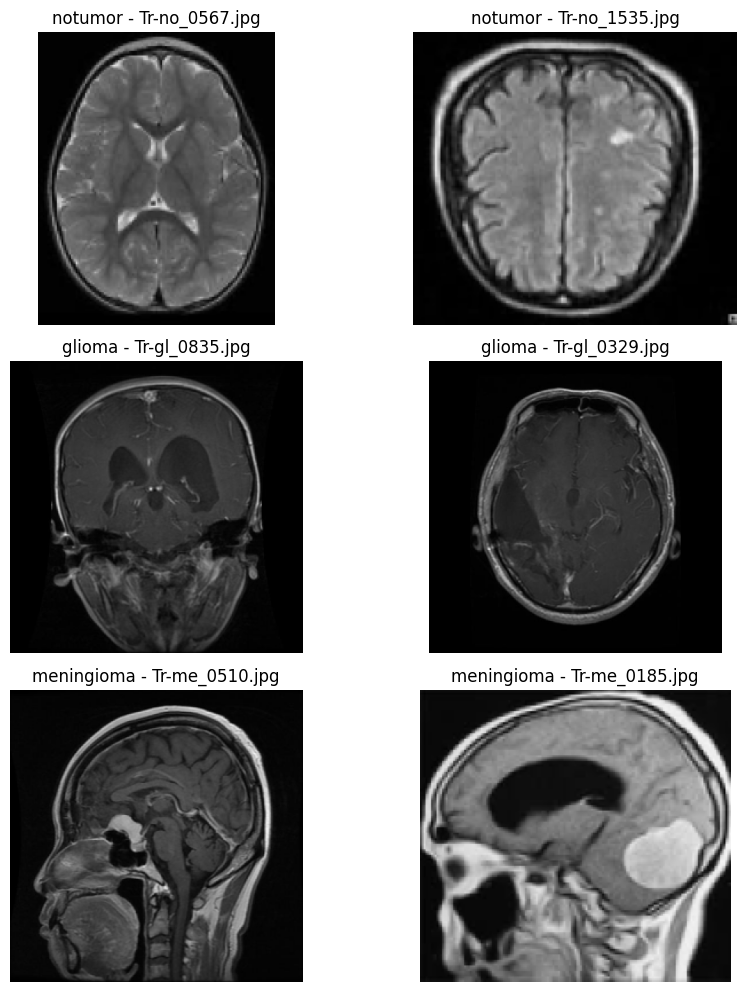

In [7]:
labels_to_display = ['notumor', 'glioma', 'meningioma']
max_images_per_label = 2

fig, axes = plt.subplots(nrows=len(labels_to_display), ncols=max_images_per_label, figsize=(10, 10))

for row, label in enumerate(labels_to_display):

    filtered_images = [(img, filename) for img, filename, img_label in zip(resized_images, filenames, labels) if img_label == label]
    
    random.shuffle(filtered_images)
    
    for col in range(min(max_images_per_label, len(filtered_images))):
        img, filename = filtered_images[col]
        ax = axes[row, col]
        ax.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
        ax.set_title(f"{label} - {filename}")
        ax.axis('off')

plt.subplots_adjust(wspace=0.1, hspace=0.3)
plt.tight_layout(pad=1.0)
plt.show()

## Augmentasi

### Rotasi

In [8]:
def rotasi(derajat, citra):
    if len(citra.shape) == 2:
        citra = cv.cvtColor(citra, cv.COLOR_GRAY2RGB)

    panjang, lebar, _ = citra.shape 
    Rotasi_img = np.zeros(citra.shape, dtype=citra.dtype)

    sudut = derajat * (np.pi / 180)
    tengahx = panjang / 2
    tengahy = lebar / 2

    for i in range(panjang):
        for j in range(lebar):
            x = int((i - tengahx) * np.cos(sudut) - (j - tengahy) * np.sin(sudut) + tengahx)
            y = int((i - tengahx) * np.sin(sudut) + (j - tengahy) * np.cos(sudut) + tengahy)
            if 0 <= x < panjang and 0 <= y < lebar:
                Rotasi_img[i][j] = citra[x][y]

    return Rotasi_img

Fungsi "rotasi(derajat, citra)" digunakan untuk melakukan rotasi citra sebesar "derajat" derajat menggunakan transformasi geometri. Jika citra masukan ("citra") berupa citra grayscale, fungsi akan mengonversinya menjadi citra RGB untuk keperluan transformasi. Selanjutnya, citra diputar mengelilingi titik tengahnya dengan sudut yang dihitung dalam radian. Proses rotasi dilakukan dengan mengubah koordinat setiap pixel sesuai dengan rumus transformasi rotasi. Hasil rotasi disimpan dalam matriks baru ("Rotasi_img") dengan mempertahankan tipe data yang sama seperti citra asli.

In [9]:
labels_to_display = ['notumor', 'glioma', 'meningioma']
sudut_rotasi = [90, 125, 180, 270]

"labels_to_display" adalah sebuah list yang berisi label-label yang akan ditampilkan atau diproses dalam kode selanjutnya, mungkin merujuk pada kategori atau jenis gambar medis seperti "notumor", "glioma", dan "meningioma".

"sudut_rotasi" adalah sebuah list yang berisi sudut rotasi yang akan diterapkan pada citra, yaitu 90, 125, 180, dan 270 derajat. Rotasi citra digunakan untuk mengubah orientasi citra dengan memutarnya sejumlah derajat tertentu, berguna dalam augmentasi data atau analisis fitur dalam pengolahan citra.

### Menampilkan Hasil Rotasi

Code tersebut digunakan untuk membuat visualisasi citra medis yang dirotasi dengan beberapa sudut untuk setiap label yang didefinisikan dalam "labels_to_display". Pertama, subplot grid dibuat dengan ukuran yang sesuai untuk menampilkan citra sebelum dan setelah rotasi. Setiap citra dipilih secara acak dari setiap label, dirotasi dengan sudut yang ditentukan, dan hasilnya ditampilkan dengan judul yang mencantumkan sudut rotasi yang digunakan. Penyesuaian ruang antar subplot dilakukan sebelum menampilkan plot.

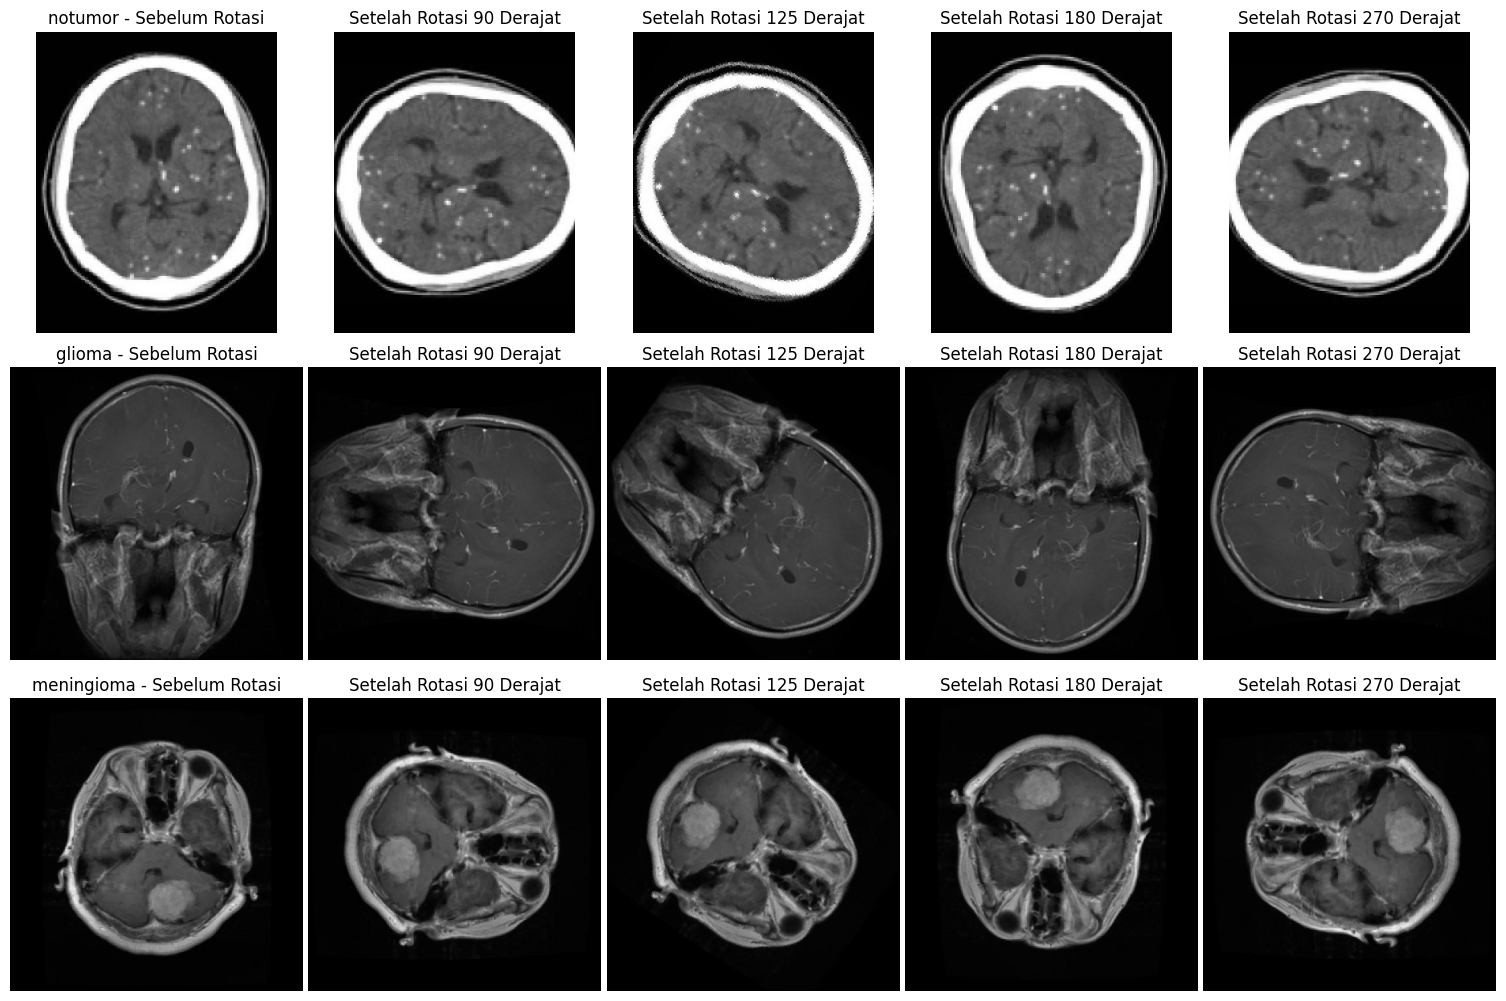

In [10]:
fig, axes = plt.subplots(nrows=len(labels_to_display), ncols=len(sudut_rotasi) + 1, figsize=(15, 10))

for row, label in enumerate(labels_to_display):

    filtered_images = [(img, filename) for img, filename, img_label in zip(resized_images, filenames, labels) if img_label == label]
    random.shuffle(filtered_images)
    citra, filename = filtered_images[0]
    
    if citra.shape[-1] == 1:
        citra = cv.cvtColor(citra, cv.COLOR_GRAY2RGB)

    ax = axes[row, 0]
    ax.imshow(cv.cvtColor(citra, cv.COLOR_BGR2RGB))
    ax.set_title(f'{label} - Sebelum Rotasi')
    ax.axis('off')
    
    for col, sudut in enumerate(sudut_rotasi):
        rotated_image = rotasi(sudut, citra)
        rotated_image = np.clip(rotated_image, 0, 255).astype(np.uint8) 
        ax = axes[row, col+1]
        ax.imshow(cv.cvtColor(rotated_image, cv.COLOR_BGR2RGB))
        ax.set_title(f'Setelah Rotasi {sudut} Derajat')
        ax.axis('off')

plt.subplots_adjust(wspace=0.1, hspace=0.3)
plt.tight_layout(pad=0.5)
plt.show()

### Thresholding

Fungsi "apply_threshold" dan perulangannya pada kode di bawah digunakan untuk melakukan thresholding pada sejumlah citra yang dipilih secara acak dari dataset, kemudian menampilkan citra-citra hasil thresholding dalam bentuk grid subplot menggunakan Matplotlib.

Kode di bawah menggabungkan pemrosesan data (sampling, thresholding) dan visualisasi citra dalam bentuk grid subplot. Fungsi "apply_threshold" digunakan untuk menerapkan thresholding pada citra-citra yang dipilih secara acak, sedangkan perulangan yang mengikuti mengorganisir citra-citra hasil thresholding dalam grid subplot untuk setiap label yang terdaftar. Hal ini memungkinkan analisis visual terhadap efek thresholding pada citra-citra medis dalam berbagai klasifikasi atau kategori yang relevan.

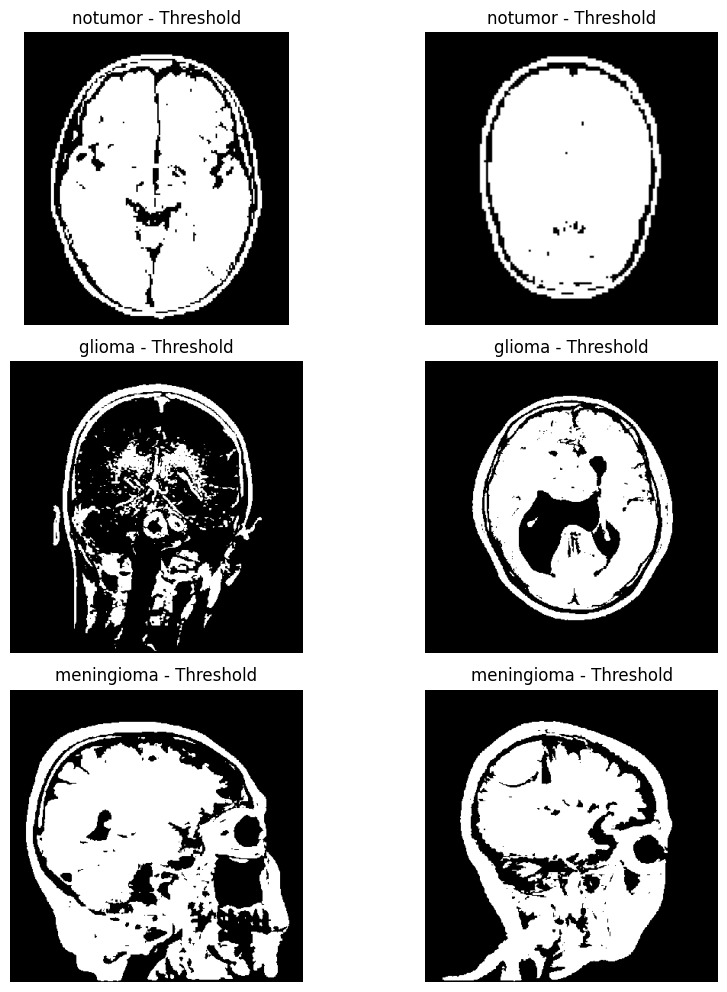

In [11]:
def apply_threshold(image_list):
    thresholded_images = []
    for img in image_list:
        if len(img.shape) == 3 and img.shape[-1] == 3:
            gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        else:
            gray_img = img
        _, thresholded_img = cv.threshold(gray_img, 60, 255, cv.THRESH_BINARY)
        thresholded_images.append(thresholded_img)
    return thresholded_images

sampled_images = []
sampled_labels = []
for label in labels_to_display:
    filtered_images = [img for img, img_label in zip(resized_images, labels) if img_label == label]
    sampled = random.sample(filtered_images, min(max_images_per_label, len(filtered_images)))
    sampled_images.extend(sampled)
    sampled_labels.extend([label] * len(sampled))

thresholded_images = apply_threshold(sampled_images)

fig, axes = plt.subplots(nrows=len(labels_to_display), ncols=max_images_per_label, figsize=(10, 10))

for row, label in enumerate(labels_to_display):
    filtered_images = [(img, filename) for img, filename, img_label in zip(thresholded_images, sampled_labels, sampled_labels) if img_label == label]
    
    for col in range(min(max_images_per_label, len(filtered_images))):
        img, filename = filtered_images[col]
        ax = axes[row, col]
        ax.imshow(img, cmap='gray')
        ax.set_title(f"{label} - Threshold")
        ax.axis('off')

plt.subplots_adjust(wspace=0.1, hspace=0.3)
plt.tight_layout(pad=1.0)
plt.show()

### Deteksi Tepi Canny

Kode di bawah bertujuan untuk mendeteksi tepi pada citra-citra hasil thresholding menggunakan metode Canny Edge Detection, kemudian menampilkan citra-citra hasil deteksi tepi dalam grid subplot dengan Matplotlib.

Kode di bawah menggabungkan proses deteksi tepi menggunakan metode Canny Edge Detection dengan visualisasi citra-citra hasil deteksi tepi dalam grid subplot. Proses dimulai dengan menerapkan deteksi tepi pada citra-citra yang telah di-threshold, kemudian mengatur dan menampilkan citra-citra tersebut dengan Matplotlib sesuai dengan label dan nama file terkait. Hal ini memungkinkan untuk analisis visual lebih lanjut terhadap karakteristik tepi pada citra-citra medis, yang dapat bermanfaat dalam diagnosa atau penelitian medis.

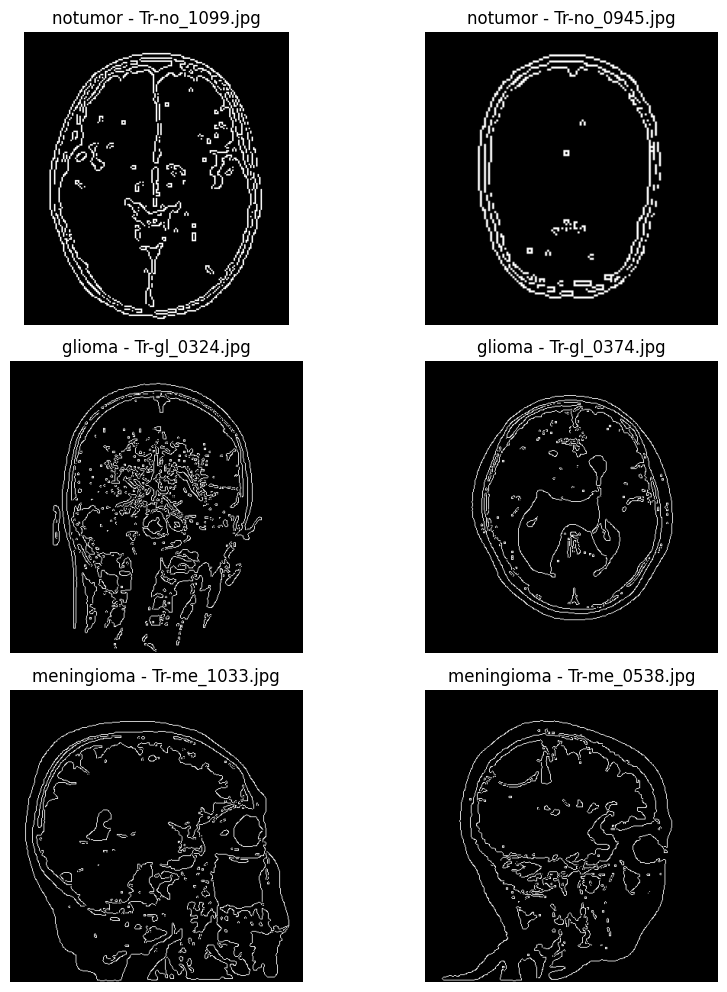

In [12]:
edge_detected_images = []
lower_bound = 100
upper_bound = 200

for img in thresholded_images:
    edge_detected_img = cv.Canny(img, lower_bound, upper_bound)
    edge_detected_images.append(edge_detected_img)

fig, axes = plt.subplots(nrows=len(labels_to_display), ncols=max_images_per_label, figsize=(10, 10))

index = 0
for row, label in enumerate(labels_to_display):
    filtered_filenames = [filename for filename, img_label in zip(filenames, labels) if img_label == label]
    random.shuffle(filtered_filenames)
    for col in range(max_images_per_label):
        if index < len(edge_detected_images):
            ax = axes[row, col]
            ax.imshow(edge_detected_images[index], cmap='gray')
            ax.set_title(f"{label} - {filtered_filenames[index % len(filtered_filenames)]}")
            ax.axis('off')
            index += 1

plt.subplots_adjust(wspace=0.1, hspace=0.3)
plt.tight_layout(pad=1.0)
plt.show()

### Segmentasi

Kode di bawah ini melakukan segmentasi citra berdasarkan deteksi tepi menggunakan algoritma Canny. Pertama, gambar-gambar yang telah diambil secara acak dari "sampled_images" diproses untuk menemukan tepinya menggunakan Canny edge detection. Kemudian, kontur dari tepi yang terdeteksi diekstraksi menggunakan "cv.findContours", dan kontur terbesar dipilih untuk membuat masker kontur. Masker ini digunakan untuk membatasi bagian dari gambar asli menggunakan operasi bitwise AND ("cv.bitwise_and"), dan hasilnya dikonversi ke format RGB sebelum disimpan dalam "segmented_images".

Setelah proses segmentasi, gambar-gambar hasil segmentasi ditampilkan dalam grid subplot dengan jumlah baris sesuai dengan jumlah label yang ditampilkan ("labels_to_display") dan jumlah kolom sesuai dengan "max_images_per_label". Setiap gambar segmentasi diberi judul yang mencakup label asli dari gambar tersebut ("sampled_labels"). Penyesuaian ruang antar subplot dilakukan sebelum menampilkan plot akhir.

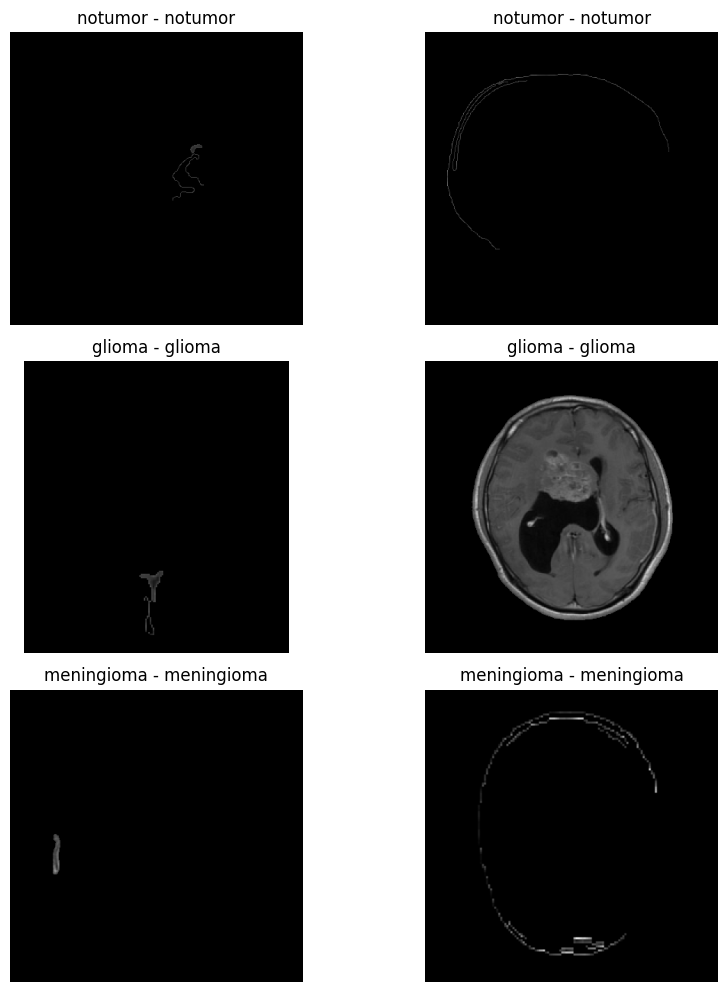

In [13]:
contour_masks = []  
segmented_images = []  

original_indices = list(range(len(sampled_images)))
random.shuffle(original_indices)

for idx in original_indices:
    edge_img = edge_detected_images[idx]
    contours = cv.findContours(edge_img, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)[-2]
    if contours:
        largest_contour = sorted(contours, key=cv.contourArea, reverse=True)[0]
        contour_mask = np.zeros(edge_img.shape[:2], dtype='uint8')
        cv.drawContours(contour_mask, [largest_contour], -1, 255, -1)
        contour_masks.append(contour_mask)

        combined_image = cv.bitwise_and(sampled_images[idx], sampled_images[idx], mask=contour_mask)
        segmented_images.append(cv.cvtColor(combined_image, cv.COLOR_BGR2RGB))

fig, axes = plt.subplots(nrows=len(labels_to_display), ncols=max_images_per_label, figsize=(10, 10))

index = 0
for row, label in enumerate(labels_to_display):
    for col in range(max_images_per_label):
        if index < len(segmented_images):
            ax = axes[row, col]
            ax.imshow(segmented_images[index])
            ax.set_title(f"{label} - {sampled_labels[index]}")
            ax.axis('off')
            index += 1

plt.subplots_adjust(wspace=0.1, hspace=0.3)
plt.tight_layout(pad=1.0)
plt.show()

### Deteksi Tepi 

In [14]:
def sobel_edge_detection(image):

    if len(image.shape) == 3 and image.shape[-1] == 3:
        gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    elif len(image.shape) == 2:
        gray = image.astype(np.uint8)
    else:
        raise ValueError("Unsupported image format. Expected BGR or grayscale image.")

    Gx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    Gy = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

    rows, cols = gray.shape
    edges = np.zeros((rows, cols), dtype=np.uint8)

    for i in range(1, rows-1):
        for j in range(1, cols-1):
            gx = np.sum(Gx * gray[i-1:i+2, j-1:j+2])
            gy = np.sum(Gy * gray[i-1:i+2, j-1:j+2])
            magnitude = np.sqrt(gx**2 + gy**2)
            edges[i, j] = min(255, int(magnitude))

    return edges

Fungsi "sobel_edge_detection" digunakan untuk mendeteksi tepi pada gambar menggunakan operator Sobel. Pertama, jika gambar memiliki tiga saluran warna (BGR), gambar dikonversi menjadi grayscale. Jika gambar sudah dalam format grayscale, ia memastikan gambar tersebut dalam format "uint8". Fungsi ini mendefinisikan dua kernel Sobel, "Gx" untuk mendeteksi gradien horizontal dan "Gy" untuk gradien vertikal. Untuk setiap piksel dalam gambar (kecuali tepi), fungsi ini menerapkan kernel Sobel untuk menghitung gradien di sumbu x ("gx") dan sumbu y ("gy"). Nilai tepi pada setiap piksel dihitung sebagai magnitude dari kedua gradien ini. Hasil akhirnya adalah gambar baru yang menyoroti tepi dengan intensitas yang sesuai, di mana nilai piksel adalah magnitude gradien yang diklip ke rentang 0-255.

### Menampilkan Hasil Deteksi Sobel

Kode di bawah mengimplementasikan deteksi tepi menggunakan operator Sobel pada serangkaian gambar yang telah di-threshold sebelumnya. Proses dimulai dengan iterasi melalui daftar "thresholded_images", di mana setiap gambar diteruskan ke fungsi "sobel_edge_detection" untuk menghasilkan gambar deteksi tepi. Hasilnya disimpan dalam "edge_detected_images". Setelah itu, gambar-gambar tersebut ditampilkan dalam subplot dengan menggunakan "plt.subplots". Setiap subplot menampilkan gambar deteksi tepi berdasarkan label yang sesuai dengan nama file sebagai judulnya. Penyesuaian layout dilakukan sebelum menampilkan plot secara keseluruhan.

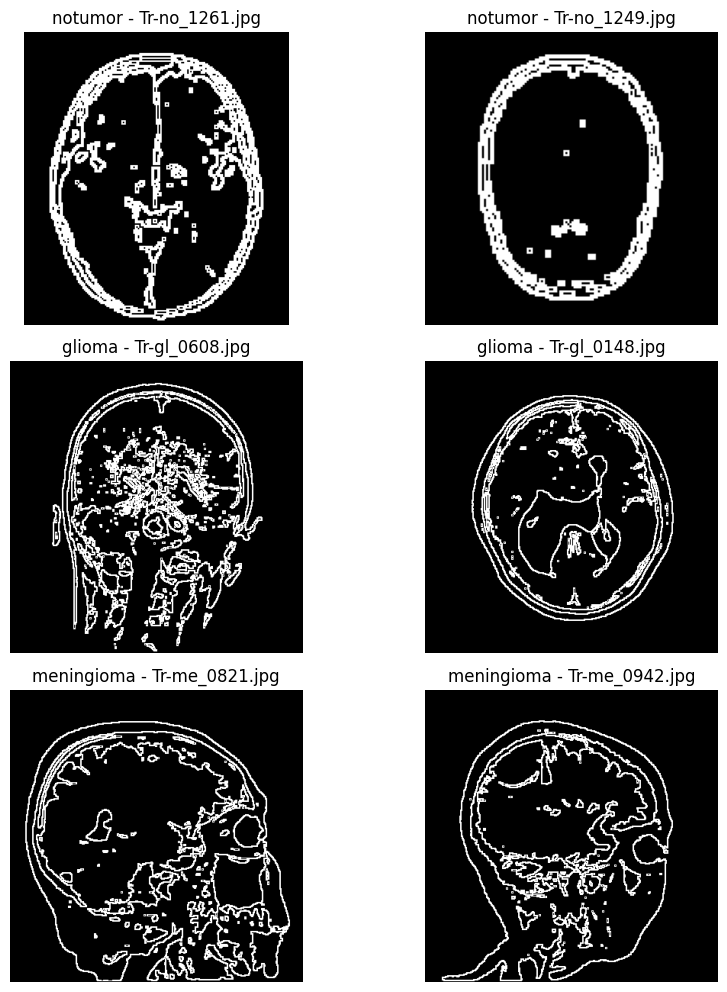

In [15]:
edge_detected_images = []
for img in thresholded_images:
    edge_detected_img = sobel_edge_detection(img)
    edge_detected_images.append(edge_detected_img)

fig, axes = plt.subplots(nrows=len(labels_to_display), ncols=max_images_per_label, figsize=(10, 10))

index = 0
for row, label in enumerate(labels_to_display):
    filtered_filenames = [filename for filename, img_label in zip(filenames, labels) if img_label == label]
    random.shuffle(filtered_filenames)
    for col in range(max_images_per_label):
        if index < len(edge_detected_images):
            ax = axes[row, col]
            ax.imshow(edge_detected_images[index], cmap='gray')
            ax.set_title(f"{label} - {filtered_filenames[index % len(filtered_filenames)]}")
            ax.axis('off')
            index += 1

plt.subplots_adjust(wspace=0.1, hspace=0.3)
plt.tight_layout(pad=1.0)
plt.show()

## Ekstraksi Fitur

In [17]:
def insertGambar(folder):
    images = [] 
    filenames = [] 
    labels = [] 

    for label in os.listdir(folder): 
        for filename in os.listdir(os.path.join(folder, label)): 
            img = cv.imread(os.path.join(folder, label, filename), cv.IMREAD_GRAYSCALE) 
            filenames.append(filename) 
            labels.append(label) 
            if img is not None: 
                images.append(img) 
    return images, filenames, labels 

images, filenames, labels = insertGambar("dataset")

def extract_glcm_features(images, labels, distances=[5], angles=[0, np.pi/4, np.pi/2, 3*np.pi/4], levels=256, symmetric=True, normed=True):
    features = ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation']
    angle_labels = ['0', '45', '90', '135']
    df_data = pd.DataFrame()
    for i, image in enumerate(images):
        image = image.astype(int)
        glcm = graycomatrix(image, distances, angles, levels, symmetric, normed)
        for feature in features:
            for angle, angle_label in zip(angles, angle_labels):
                feat_a = graycoprops(glcm, feature)[0, int(angle*4/np.pi)]
                df_data.loc[i, f'{feature}_{angle_label}'] = feat_a
        for angle, angle_label in zip(angles, angle_labels):
            asm = np.sum(glcm[:, :, 0, int(angle*4/np.pi)]**2)
            entropy = -np.sum(glcm[:, :, 0, int(angle*4/np.pi)]*np.log2(glcm[:, :, 0, int(angle*4/np.pi)] + np.finfo(float).eps))
            df_data.loc[i, f'asm_{angle_label}'] = asm
            df_data.loc[i, f'entropy_{angle_label}'] = entropy
        df_data.loc[i, 'label'] = labels[i]
    return df_data

glcm_features = extract_glcm_features(images, labels)


Kode di atas terdiri dari dua bagian utama: fungsi insertGambar dan extract_glcm_features, serta bagian eksekusi yang memanggil kedua fungsi tersebut untuk memuat gambar dan mengekstrak fitur GLCM. Pertama, fungsi insertGambar bertanggung jawab untuk memuat gambar-gambar dari folder yang ditentukan (folder). Dalam prosesnya, fungsi ini menggunakan modul os untuk berinteraksi dengan sistem file dan cv2 (OpenCV) untuk membaca gambar dalam format grayscale. Setiap gambar yang berhasil dibaca dimasukkan ke dalam list images, sedangkan nama file dan label gambar (berdasarkan nama folder) dimasukkan ke dalam list filenames dan labels masing-masing.

Selanjutnya, fungsi extract_glcm_features digunakan untuk mengekstrak fitur GLCM (Gray-Level Co-occurrence Matrix) dari gambar-gambar yang telah dimuat sebelumnya. Fungsi ini menerima images (gambar-gambar dalam format grayscale), labels (label untuk setiap gambar), serta parameter tambahan seperti distances, angles, levels, symmetric, dan normed yang mendefinisikan bagaimana GLCM dihitung. Prosesnya melibatkan penghitungan GLCM menggunakan fungsi graycomatrix dari skimage.feature, diikuti dengan penghitungan properti GLCM seperti kontras, dissimilaritas, homogenitas, energi, dan korelasi menggunakan graycoprops. Hasil dari ekstraksi fitur disimpan dalam bentuk DataFrame menggunakan pandas, yang kemudian akan berguna untuk analisis lebih lanjut seperti klasifikasi atau visualisasi.

Pada bagian eksekusi kode, setelah gambar-gambar dimuat dan fitur GLCM diekstrak, hasilnya disimpan dalam variabel glcm_features. Proses ini memanfaatkan kedua fungsi sebelumnya untuk mempersiapkan data secara terstruktur yang siap digunakan untuk tujuan analisis lebih lanjut. Dengan demikian, keseluruhan kode memungkinkan untuk memuat dataset gambar, mengekstrak fitur-fitur penting menggunakan GLCM, dan menyimpan hasilnya dalam bentuk DataFrame untuk keperluan analisis selanjutnya.

In [18]:
glcm_features

,contrast_0,contrast_45,contrast_90,contrast_135,dissimilarity_0,dissimilarity_45,dissimilarity_90,dissimilarity_135,homogeneity_0,homogeneity_45,...,correlation_135,asm_0,entropy_0,asm_45,entropy_45,asm_90,entropy_90,asm_135,entropy_135,label
0,559.777906,509.452248,344.406824,556.285228,10.192015,9.926541,7.828915,10.320211,0.525216,0.506688,...,0.853133,0.067387,8.726715,0.062852,8.819382,0.069917,8.548557,0.062932,8.835619,glioma
1,530.754831,495.865564,307.989568,500.072653,9.848681,9.833882,7.633190,9.827287,0.486170,0.470862,...,0.868677,0.055617,9.068196,0.053642,9.132493,0.059928,8.860055,0.053618,9.129348,glioma
2,548.509885,546.982996,382.903399,547.482555,10.044109,10.212761,8.186606,10.177506,0.474662,0.460895,...,0.837063,0.051748,9.272096,0.050389,9.327289,0.056419,9.053657,0.050510,9.327037,glioma
3,374.178778,347.123043,230.759188,357.793675,8.153276,8.027075,6.442797,8.200466,0.500121,0.485695,...,0.770719,0.057153,8.732030,0.055035,8.783869,0.060781,8.543866,0.055052,8.806700,glioma
4,406.292845,400.307273,295.610546,435.152009,9.210922,9.280248,7.684395,9.631743,0.419285,0.404998,...,0.806638,0.045089,9.627480,0.044787,9.672618,0.050168,9.401011,0.044935,9.683259,glioma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4250,928.322647,998.533678,801.303667,1013.067088,16.105817,16.977020,14.529057,17.053551,0.349622,0.303892,...,0.729049,0.023916,10.248851,0.017457,10.425554,0.022540,10.188954,0.017551,10.436551,notumor
4251,3459.426343,3703.518192,2938.759879,3727.699433,28.247273,30.071211,25.518707,29.823099,0.416233,0.401798,...,0.478740,0.075795,9.589678,0.069139,9.741021,0.080263,9.492527,0.069923,9.724616,notumor
4252,2144.379152,2368.008497,1959.990061,2434.523720,21.268404,22.702791,19.769293,23.124486,0.384732,0.372960,...,0.645282,0.036249,9.736841,0.035993,9.821292,0.051475,9.475415,0.035741,9.838078,notumor
4253,6012.688196,6585.322284,5059.342706,6496.109586,47.320134,50.279571,42.648091,49.909338,0.201863,0.186003,...,0.436881,0.010478,12.145671,0.009034,12.265758,0.012596,12.048846,0.009174,12.260068,notumor


Variabel glcm_features dalam kode di atas merupakan sebuah DataFrame pandas yang berisi hasil ekstraksi fitur GLCM (Gray-Level Co-occurrence Matrix) dari kumpulan gambar yang telah dimuat dari folder "dataset". Setiap baris dalam DataFrame ini mewakili satu gambar dari dataset, sedangkan kolom-kolomnya mencakup berbagai fitur GLCM seperti kontras, dissimilaritas, homogenitas, energi, entropi, dan korelasi. Ekstraksi fitur dilakukan dengan memanfaatkan fungsi graycomatrix dan graycoprops dari pustaka skimage.feature, yang menghasilkan nilai-nilai numerik untuk setiap fitur berdasarkan GLCM dari gambar-gambar grayscale yang dimasukkan.